# Display Physionet Recordings

see: https://physionet.org/physiobank/database/ctu-uhb-ctgdb/


Possible Analysis Approach:
- Compute FFT (after clean-up)
- Compute DWT and look at energy & entrypy by band

In [1]:
import config_local
from config_common import *

In [2]:
import wfdb
import os
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [3]:
from ctg_utils import get_all_recno, parse_meta_comments

# Code

In [4]:
def filtUC(data, lowcut, fs=4, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='lowpass')
    y = scipy.signal.filtfilt(b, a, data)
    return y

## Process Recordings


Record: 1001
nSamples: 19200


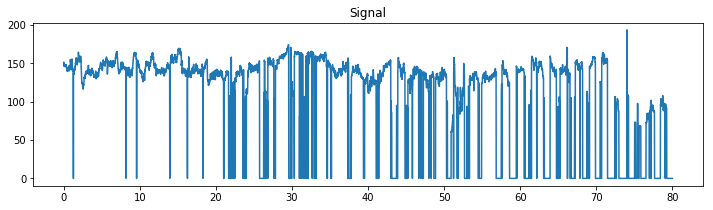

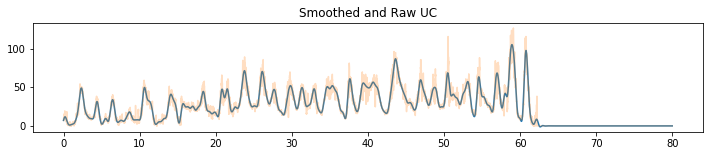

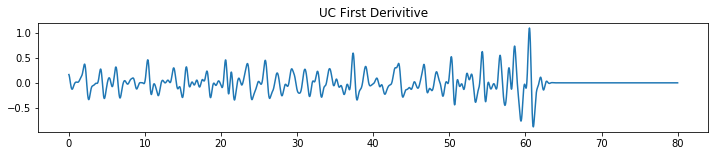

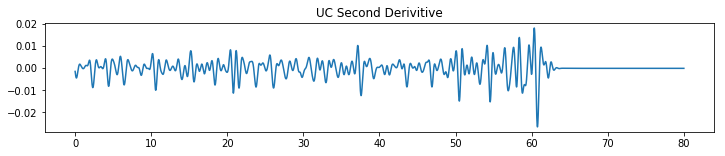

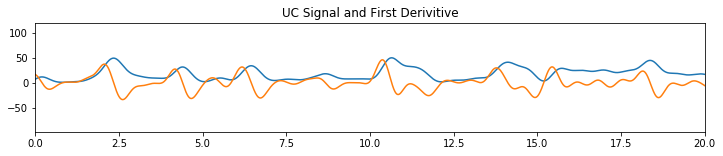

{'base_date': None,
 'base_time': None,
 'comments': {'!NotReadyYet!': {'HIE': 0,
                                'Intubation': 0,
                                'Main diag.': 0,
                                'NICU days': 0,
                                'Other diag.': 0,
                                'Seizures': 0},
              'Delivery': {'CK/KP': 0,
                           'Deliv. type': 1,
                           'I.stage': 232,
                           'II.stage': 20,
                           'Induced': 0,
                           'NoProgress': 0,
                           'Presentation': 2},
              'Fetus/Neonate': {'Gest. weeks': 37, 'Sex': 2, 'Weight(g)': 2660},
              'Maternal': {'Age': 32,
                           'Diabetes': 1,
                           'Gravidity': 1,
                           'Hypertension': 0,
                           'Liq. praecox': 1,
                           'Meconium': 0,
                           'Parity

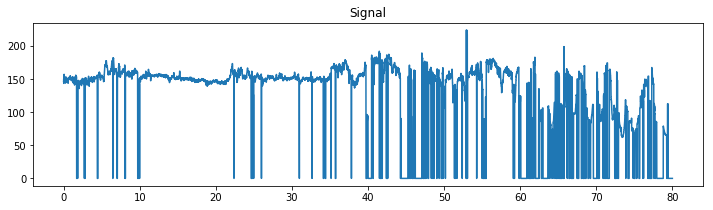

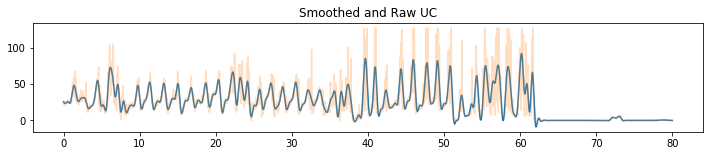

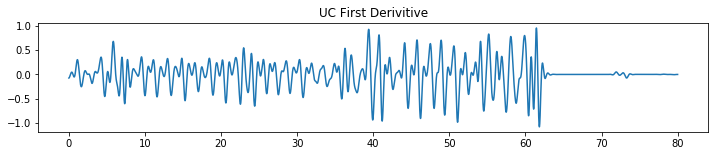

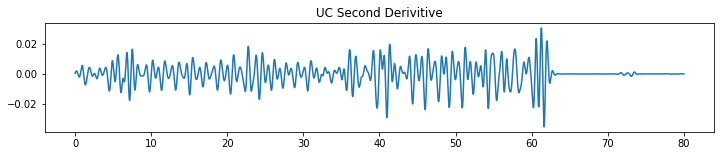

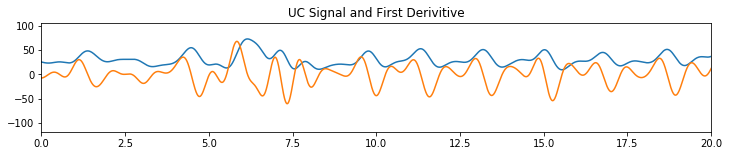

{'base_date': None,
 'base_time': None,
 'comments': {'!NotReadyYet!': {'HIE': 0,
                                'Intubation': 0,
                                'Main diag.': 0,
                                'NICU days': 0,
                                'Other diag.': 0,
                                'Seizures': 0},
              'Delivery': {'CK/KP': 0,
                           'Deliv. type': 1,
                           'I.stage': 220,
                           'II.stage': 20,
                           'Induced': 0,
                           'NoProgress': 0,
                           'Presentation': 1},
              'Fetus/Neonate': {'Gest. weeks': 41, 'Sex': 2, 'Weight(g)': 2900},
              'Maternal': {'Age': 23,
                           'Diabetes': 0,
                           'Gravidity': 1,
                           'Hypertension': 0,
                           'Liq. praecox': 0,
                           'Meconium': 1,
                           'Parity

In [5]:
show_meta = True
for recno in sorted(get_all_recno(local_recordings_dir_full)):
    recno_full = os.path.join(local_recordings_dir_full, recno)
    print('\nRecord: {}'.format(recno))
    all_sig, meta = wfdb.io.rdsamp(recno_full)
    print('nSamples: {}'.format(all_sig.shape[0]))
    
    sig_hr = all_sig[:, 0]
    sig_uc = all_sig[:, 1]
    ts = np.arange(all_sig.shape[0])/meta['fs']
    tm = ts/60
    meta['comments'] = parse_meta_comments(meta['comments'])
    
    plt.figure(figsize=(12, 3))
    plt.title('Signal')
    plt.plot(tm, sig_hr)
    plt.show()

    sig_filt_uc = filtUC(sig_uc, 1.0/40, fs=meta['fs'], order=5)
    
    plt.figure(figsize=(12, 2))
    plt.title('Smoothed and Raw UC')
    plt.plot(tm, sig_filt_uc)
    plt.plot(tm, sig_uc, alpha=0.25)
    plt.show()
    
    plt.figure(figsize=(12, 2))
    plt.title('UC First Derivitive')
    plt.plot(tm[1:], np.diff(sig_filt_uc))
    plt.show()
    
    plt.figure(figsize=(12, 2))
    plt.title('UC Second Derivitive')
    plt.plot(tm[2:], np.diff(sig_filt_uc, 2))
    plt.show()
    
    plt.figure(figsize=(12, 2))
    plt.title('UC Signal and First Derivitive')
    plt.plot(tm, sig_filt_uc)
    plt.plot(tm[1:], np.diff(sig_filt_uc)*100)
    plt.xlim(0, 20)
    plt.show()
    
    if show_meta:
        pprint(meta)
